Softmax Logistic Regression ML based off cs182 lecture 2

In [115]:
import numpy as np

class Logisitic_Regression():
    def __init__(self, num_data, num_features, num_classes, learning_rate = 0.001, max_iterations = 100000, threshold = 1e-6, reg_hp = 0.05):
        # initialize inputs
        self.num_data = num_data
        self.num_features = num_features
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.threshold = threshold
        self.reg_hp = reg_hp


    def fit_model(self, X, Y):
        self.num_data = X.shape[0]
        initial_weights = np.zeros((self.num_features, self.num_classes))
        initial_prob = self.softmax(X, initial_weights)
        final_weights, loss = self.gradient_descent(X, Y, initial_prob, initial_weights)
        return final_weights, loss
    
    def predict(self, new_data, final_weights):
        probs = self.softmax(new_data, final_weights)
        return np.argmax(probs, axis = 1)


    def softmax(self, X, weights):
        """
        Input:
        X - MxN matrix of starting data parameters
        weights - NxP matrix of weights for each parameter given a classification

        Output: 
        prob of class - MxP matrix of a prob distribution for classification given input
        """
        res = np.zeros((X.shape[0],self.num_classes))

        # loop over all rows
        for i in range(X.shape[0]):
            row = X[i, :]
            prob = row @ weights
            prob = np.exp(prob)
            prob = prob / np.sum(prob)

            # update res with softmax row
            res[i,:] = prob

        return res
                

    def negative_log_likelihood(self, X, Y, weights):
        """
        Input:
        X - MxN matrix of starting data parameters
        Y - PxM matrix of starting data one hot encoded by target class
        weights - NxP matrix of weights for each parameter given a classification

        Output: 
        negative_log_likelihood function as the loss function with l2 regularization
        """

        prob = self.softmax(X, weights)
        # utilize one-hot-encoding to sum values with their respective target labels
        target_prob = prob @ np.transpose(Y)

        # sum values on main diagonal
        nll = np.trace(np.log(target_prob))

        # make negative and normalize
        nll /= -self.num_data

        # add l2 regularization
        nll += self.reg_hp * (np.linalg.norm(weights))**2

        return nll

    def gradient(self, X, Y, P, weights):
        # returns gradeint of loss function
        return (1/self.num_data) * (np.transpose(X) @ (P-Y)) + 2 * self.reg_hp * weights

    def gradient_descent(self, X, Y, P, weights):
        """
        Input:
        X - MxN matrix of starting data parameters
        Y - PxM matrix of starting data one hot encoded by target class
        P - MxP matrix of probabilties of classification for data
        weights - NxP matrix of weights for each parameter given a classification

        Output: 
        gradient vector for gradient descent
        """

        # count steps and store loss for graphical analysis
        step = 0
        loss = []
        curr_weight = weights
        curr_loss = self.negative_log_likelihood(X, Y, curr_weight)
        loss.append(curr_loss)

        # repeate algorithim until max iterations is reached
        while step < self.max_iterations:
            P = self.softmax(X, curr_weight)
            gradient = self.gradient(X, Y, P, curr_weight)
            curr_weight -= self.learning_rate * gradient
            new_loss = self.negative_log_likelihood(X, Y, curr_weight)

            # stop aglorithim early if change in loss is below theshold
            if abs(loss[-1] - new_loss) < self.threshold:
                break
            
            loss.append(new_loss)
            step += 1
        
        return curr_weight, loss

    


Test Algorithim with data

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


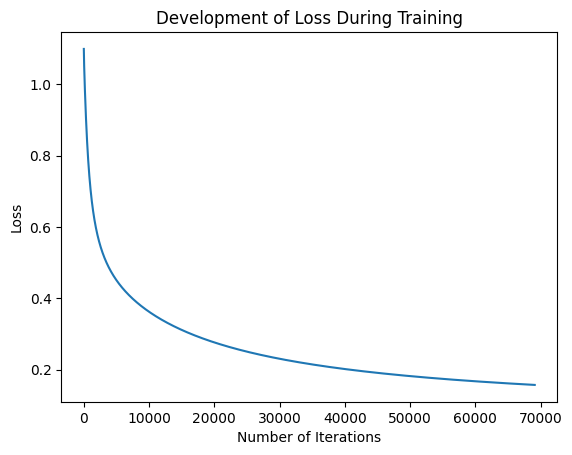

[np.float64(1.0986122886681096), np.float64(1.097303515271306), np.float64(1.0960219605803574), np.float64(1.0947665277028553), np.float64(1.0935361660513472), np.float64(1.0923298693648968), np.float64(1.0911466738154296), np.float64(1.0899856561952859), np.float64(1.0888459321825366), np.float64(1.087726654680766), np.float64(1.086627012230149), np.float64(1.0855462274867764), np.float64(1.084483555767324), np.float64(1.0834382836562555), np.float64(1.0824097276728877), np.float64(1.081397232995747), np.float64(1.0804001722417569), np.float64(1.079417944297896), np.float64(1.0784499732030721), np.float64(1.0774957070780498), np.float64(1.0765546171013618), np.float64(1.07562619652922), np.float64(1.0747099597575291), np.float64(1.0738054414241915), np.float64(1.0729121955499565), np.float64(1.0720297947161608), np.float64(1.071157829277757), np.float64(1.070295906610116), np.float64(1.0694436503881397), np.float64(1.0686006998962905), np.float64(1.0677667093682024), np.float64(1.0669

In [101]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
y_onehot = pd.get_dummies(y, dtype = float).to_numpy()
num_data = X.shape[0]
num_features = X.shape[1]
num_classes = y_onehot.shape[1]
learning_rate = 0.001
max_iterations = 100000
threshold = 1e-6
reg_hp = 0


model = Logisitic_Regression(num_data, num_features, num_classes, learning_rate, max_iterations, threshold, reg_hp)
weights, loss = model.fit_model(X, y_onehot)

final_predict = model.predict(X, weights)
print(final_predict == y)

fig, ax = plt.subplots()
plt.title("Development of Loss During Training")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
ax.plot(range(len(loss)), loss)
plt.show()
print(loss)



In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X, y = load_iris(return_X_y=True)
y_onehot = pd.get_dummies(y, dtype = float).to_numpy()
num_data = X.shape[0]
num_features = X.shape[1]
num_classes = y_onehot.shape[1]
learning_rate = 0.001
max_iterations = 100000
threshold = 1e-6
reg_hp = 0

model = Logisitic_Regression(num_data, num_features, num_classes, learning_rate, max_iterations, threshold, reg_hp)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train_onehot = pd.get_dummies(y_train, dtype = float).to_numpy()

final_weights, loss = model.fit_model(X_train, y_train_onehot)
y_pred = model.predict(X_test, final_weights)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

joe = confusion_matrix(y_test, y_pred)
print(joe)
# print(f' TP: {tp}    FP: {fp}\n FN: {fn}    TN: {tn}')

# percision = tp / (tp + fp)
# recall = tp / (tp + fn)
# f1_score = 2 * (percision * recall) / (percision + recall)

# print("percision: " + percision + ", recall: " + recall + ", f1: " + f1_score)


Accuracy: 1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
